# Coursework 2: Internet of Things.

This document contains Section 2 of Coursework 2, *Data analytics, inferences and insights*  
  
The analytics performed in this document are on historical data. This project also included some real-time analysis and calculations [Power, Cost, Predicted Cost], these are described in more detail in the report.  

## Time-Series Data Sources 
  
The 2 time-series data sources used for this project are a Bosch BME680 sensor, configured for a Raspberry Pi, and API Data from the Open Weather Map.  
  
Each section below explains these data-sources, the associated sampling rates and why they were selected.  
  
**Assumptions:**  
* Heat dissipation is constant for all temperatures.
* House is built to building standard for -2&deg;C.  
* API Weather Data is accurate to 2 decimal places.

## BME680

### Temperature  
  
Write here. Include the .gov reference of 30 Secs to start a fire and OWM information regarding 10 minute sampling rate.  
  
  
### Humidity      
  
Write here.  
  
  
### Pressure  
  
Write here.  
  
  
## Open Weather Map (OWM API)

### Temperature  
  
Write here. Include the .gov reference of 30 Secs to start a fire and OWM information regarding 10 minute sampling rate.  
  
  
### Humidity      
  
Write here.  
  
  
### Pressure  
  
Write here.  
  
  
## Generated Data
  
These are streams of data which are generated onboard the Raspberry Pi, as the d
### Power  
  
Write here. Use the heat dissapation estimation here.  
  
  
### Cost  
  
Write here. Use the british gas.  
  
  

## Import Modules

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy as sp
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from datetime import datetime
import time
from sklearn.preprocessing import normalize

## Read data from CSV file

In [267]:
data = pd.read_csv(
    './data-storage/usb/data_log_combined.csv')

n, m = np.shape(data)

data.head()

,time,temp_in,press_in,hum_in,time_measured,temp_out,press_out,hum_out,time_diff,temp_diff,press_diff,hum_diff,power,cost_window,cost_predict
0,2019/01/03 02:25:08,18.92,1043.99,55.893,2019/01/03 01:50:00,3.67,1043,75,0:35:08,15.25,0.99,-19.107,1936.75,0.000,0.00
1,2019/01/03 02:25:25,18.92,1043.99,55.990,2019/01/03 01:50:00,3.67,1043,75,0:35:25,15.25,0.99,-19.010,1936.75,0.023,5.38
2,2019/01/03 02:25:41,18.92,1043.99,56.198,2019/01/03 01:50:00,3.67,1043,75,0:35:41,15.25,0.99,-18.802,1936.75,0.030,5.38
3,2019/01/03 02:26:01,18.91,1044.00,55.882,2019/01/03 01:50:00,3.67,1043,75,0:36:01,15.24,1.00,-19.118,1935.48,0.024,5.38
4,2019/01/03 02:26:17,18.91,1044.00,56.124,2019/01/03 01:50:00,3.67,1043,75,0:36:17,15.24,1.00,-18.876,1935.48,0.023,5.38


In [268]:
time = data.iloc[:,0]

for i in range(n):
    t = datetime.strptime(time[i], '%Y/%m/%d %H:%M:%S')
    time[i] = t

time.head()

0    2019-01-03 02:25:08
1    2019-01-03 02:25:25
2    2019-01-03 02:25:41
3    2019-01-03 02:26:01
4    2019-01-03 02:26:17
Name: time, dtype: object

In [269]:
inside = data.iloc[:,1:4]

inside.head()

,temp_in,press_in,hum_in
0,18.92,1043.99,55.893
1,18.92,1043.99,55.990
2,18.92,1043.99,56.198
3,18.91,1044.00,55.882
4,18.91,1044.00,56.124


In [270]:
outside = data.iloc[:,5:8]

outside.head()

,temp_out,press_out,hum_out
0,3.67,1043,75
1,3.67,1043,75
2,3.67,1043,75
3,3.67,1043,75
4,3.67,1043,75


In [271]:
delta = data.iloc[:,9:12]

delta.head()

,temp_diff,press_diff,hum_diff
0,15.25,0.99,-19.107
1,15.25,0.99,-19.010
2,15.25,0.99,-18.802
3,15.24,1.00,-19.118
4,15.24,1.00,-18.876


In [272]:
delta_temp = data.iloc[:,9]
metrics = data.iloc[:,12:]

frames = [delta_temp, metrics]

metrics = pd.concat(frames, axis=1)

metrics.head()

,temp_diff,power,cost_window,cost_predict
0,15.25,1936.75,0.000,0.00
1,15.25,1936.75,0.023,5.38
2,15.25,1936.75,0.030,5.38
3,15.24,1935.48,0.024,5.38
4,15.24,1935.48,0.023,5.38


In [273]:
temperature_inside = inside['temp_in']
pressure_inside = inside['press_in']
humidity_inside = inside['hum_in']


temperature_outside = outside['temp_out']
pressure_outside = outside['press_out']
humidity_outside = outside['hum_out']

delta_temperature = delta['temp_diff']
delta_pressure = delta['press_diff']
delta_humidity = delta['hum_diff']

power = metrics['power']
cost_increment = metrics['cost_window']
cost_hourly = metrics['cost_predict']

## Time-Series Plot

This section contains simple time-series plots. They show each data stream, over the recording period.  
As a result, they also highlight the blackspots in the data recording. This was as a result of the exception for the API request code check failing. Various fixes were attempted, and failed, the final fix was commited on the night of 6th-7th January as shown by the continous data after this point. With this fix, the program is robust enough to run until all memory is utilised. As the data is backed-up on Github, a future fix would be to erase the data after a specified period, perhaps once a month.

### Temperature, Humidity, Pressure

**Inside:** BME680  
  
**Outside:** Open Weather Map API

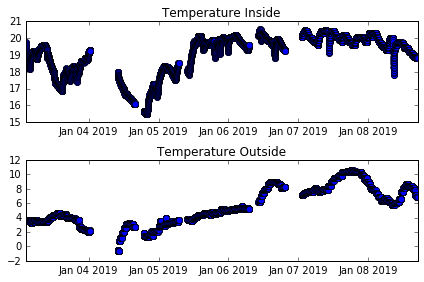

In [274]:
plt.subplot(2, 1, 1)
plt.plot_date(time,temperature_inside)
plt.title('Temperature Inside')

plt.subplot(2, 1, 2)
plt.plot_date(time,temperature_outside)
plt.title('Temperature Outside')

plt.tight_layout()

In [275]:
trace_temp_inside = go.Scatter(
    x = time,
    y = temperature_inside,
    mode = 'markers',
    name = 'Temperature Inside (&deg;C)'
)

trace_temp_outside = go.Scatter(
    x = time,
    y = temperature_outside,
    mode = 'markers',
    name = 'Temperature Outside (&deg;C)'
)

data = [trace_temp_inside, trace_temp_outside]
py.iplot(data, filename='Temperatures')

The draw time for this plot will be slow for clients without much RAM.


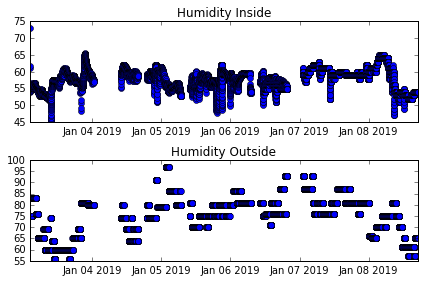

In [276]:
plt.subplot(2, 1, 1)
plt.plot_date(time, humidity_inside)
plt.title('Humidity Inside')

plt.subplot(2, 1, 2)
plt.plot_date(time, humidity_outside)
plt.title('Humidity Outside')

plt.tight_layout()

In [277]:
trace_hum_inside = go.Scatter(
    x = time,
    y = humidity_inside,
    mode = 'markers',
    name = 'Humidity Inside (%RH)'
)

trace_hum_outside = go.Scatter(
    x = time,
    y = humidity_outside,
    mode = 'markers',
    name = 'Humidity Outside (%RH)'
)

data = [trace_hum_inside, trace_hum_outside]
py.iplot(data, filename='Humidities')

The draw time for this plot will be slow for clients without much RAM.


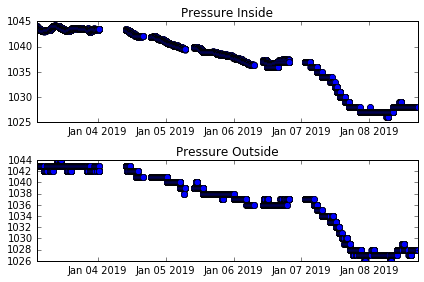

In [278]:
plt.subplot(2, 1, 1)
plt.plot_date(time, pressure_inside)
plt.title('Pressure Inside')

plt.subplot(2, 1, 2)
plt.plot_date(time, pressure_outside)
plt.title('Pressure Outside')

plt.tight_layout()

In [279]:
trace_press_inside = go.Scatter(
    x = time,
    y = pressure_inside,
    mode = 'markers',
    name = 'Temperature Inside (hPa)'
)

trace_press_outside = go.Scatter(
    x = time,
    y = pressure_outside,
    mode = 'markers',
    name = 'Pressure Outside (hPa)'
)

data = [trace_press_inside, trace_press_outside]
py.iplot(data, filename='Pressures')

The draw time for this plot will be slow for clients without much RAM.


### Metrics

These metrics were computed as the data was recorded. The intention for this is to make it easier for apps, using this device, to read the metrics from the house. Additionally, if there were multiple devices in each house, it would be easier for each device to compute the metrics for their house due to varying energy suppliers and household heat dissipation.

**Power(W): P** Calculated using the temperature difference and a heat dissipation constant, as derived [here](https://www.open.edu/openlearn/nature-environment/the-environment/energy-buildings/content-section-2.4.1). The constant in this example was originally trialled, and resulted in similar cost predictions to the smart meter in the house the recording was coming from. However, this was during the holiday period and when the rest of the occupants - with the largest and most inefficiently heated rooms - returned this was no longer an accurate prediction. However, the constant was not changed as this would skew the recordings. Therefore, the constant was compared after recording had completed, of which the findings are in the main report.

**Cost(£):** There are two aspects to the cost metric, cost increment and cost prediction.  
  
The **cost increment** is based on the time since the last recording, and then using P<sub>t</sub> and P<sub>t-1</sub> estimates to calculate the energy expended during this period. Then, using the [British Gas cost per kWh of Gas](https://www.ukpower.co.uk/home_energy/tariffs-per-unit-kwh), as they are our supplier, to calculate the cost of the energy over that window.  
  
The **cost prediction** is based solely on the instantaneous Power estimate, this is then divided by 1000 and multiplied by the cost per kWh. This is useful in showing a user how much their energy should cost for that day, allowing them to make decisions based on this. This can then be extrapolated to daily and weekly predictions as a more relevant statistic to which users can make decisions. These metrics are used in the API, to make it simpler for apps using the data to show important information.

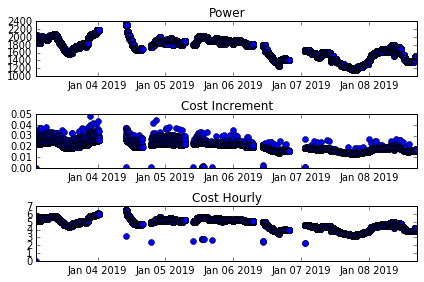

In [280]:
n = 3
m = 1

plt.subplot(n, m, 1)
plt.plot_date(time, power)
plt.title('Power')

plt.subplot(n, m, 2)
plt.plot_date(time, cost_increment)
plt.title('Cost Increment')

plt.subplot(n, m, 3)
plt.plot_date(time, cost_hourly)
plt.title('Cost Hourly')

plt.tight_layout()

In [281]:
trace_temp_diff = go.Scatter(
    x = time,
    y = delta_temperature,
    mode = 'markers',
    name = 'Temperature Difference (&deg;C)')

trace_power = go.Scatter(
    x = time,
    y = power,
    mode = 'markers',
    name = 'Estimated Power Consumption (W)'
)

trace_cost_inc = go.Scatter(
    x = time,
    y = cost_increment,
    mode = 'markers',
    name = 'Cost Increment (p)'
)

trace_cost_hour = go.Scatter(
    x = time,
    y = cost_hourly,
    mode = 'markers',
    name = 'Hourly Cost Prediction (p)'
)

data = [trace_temp_diff, trace_power, trace_cost_inc, trace_cost_hour]
py.iplot(data, filename='Metrics')

The draw time for this plot will be slow for all clients.


In [282]:
normalized_dt=(delta_temperature-delta_temperature.min())/(delta_temperature.max()-delta_temperature.min())
normalized_power = (power-power.min())/(power.max()-power.min())
normalized_cost_inc = (cost_increment-cost_increment.min())/(cost_increment.max()-cost_increment.min())
normalized_cost_hour = (cost_hourly-cost_hourly.min())/(cost_hourly.max()-cost_hourly.min())

trace_temp_diff = go.Scatter(
    x = time,
    y = normalized_dt,
    mode = 'markers',
    name = 'Temperature Difference (&deg;C)')

trace_power = go.Scatter(
    x = time,
    y = normalized_power,
    mode = 'markers',
    name = 'Estimated Power Consumption (W)'
)

trace_cost_inc = go.Scatter(
    x = time,
    y = normalized_cost_inc,
    mode = 'markers',
    name = 'Cost Increment (p)'
)

trace_cost_hour = go.Scatter(
    x = time,
    y = normalized_cost_hour,
    mode = 'markers',
    name = 'Hourly Cost Prediction (p)'
)

data = [trace_temp_diff, trace_power, trace_cost_inc, trace_cost_hour]
py.iplot(data, filename='Normalised Metrics')

The draw time for this plot will be slow for all clients.


## Interpolation

Filling the gaps in the data.  

In [320]:
data_interpolation = pd.read_csv(
    './data-storage/usb/data_log_combined.csv')

n, m = data_interpolation.shape

timelist = []
time_test = data_interpolation['time'][:]

for i in range(n):
    t = datetime.strptime(time_test[i], '%Y/%m/%d %H:%M:%S')
    time_test[i] = t
    
time_test.head()
print(type(time_test[0]))

<type 'datetime.datetime'>


In [323]:
diff_vector = time_test.diff()

diff_vector.head()

17.0


In [293]:
max_value = max(diff_vector[1:])
print(max_value)

median = np.median(diff_vector[1:])
print(median)

mean = np.mean(diff_vector[1:])
print(mean)

diff_sorted = sorted(diff_vector[1:])
print(diff_sorted[-6:])

largest_window = diff_sorted[-6]

0 days 09:23:31
15000000000 nanoseconds
0 days 00:00:17.364861
[Timedelta('0 days 00:00:34'), Timedelta('0 days 02:59:27'), Timedelta('0 days 03:00:56'), Timedelta('0 days 03:14:52'), Timedelta('0 days 05:33:23'), Timedelta('0 days 09:23:31')]


In [283]:
data = [go.Histogram(x=diff_sorted[1:])]

py.iplot(data, filename='Sample Interval Histogram')

In [331]:
ind1 = diff_vector.index[diff_vector == diff_sorted[-1]]
ind2 = diff_vector.index[diff_vector == diff_sorted[-2]]
ind3 = diff_vector.index[diff_vector == diff_sorted[-3]]
ind4 = diff_vector.index[diff_vector == diff_sorted[-4]]
ind5 = diff_vector.index[diff_vector == diff_sorted[-5]]

time_index = []
for i in range(len(diff_sorted)):
    ind = diff_vector.index[diff_vector == diff_sorted[i]]
    time_index.append(ind)

In [333]:
time_test[time_index[-1][0]]

datetime.datetime(2019, 1, 4, 9, 53, 22)

In [342]:
end = time_test[time_index[-1][0]]
start = time_test[time_index[-1][0] - 1]
print end
print start

delta_time = end - start
print('{:.0f} samples were skipped'.format(round_up(delta_time.total_seconds()/15)))

2019-01-04 09:53:22
2019-01-04 00:29:51


NameError: name 'round_up' is not defined

In [338]:
print(time_test[ind1-1])
print(time_test[ind1])

print(time_test[ind2-1])
print(time_test[ind2])

print(time_test[ind3-1])
print(time_test[ind3])

print(time_test[ind4-1])
print(time_test[ind4])

print(time_test[ind5-1])
print(time_test[ind5])

2019-01-04 09:53:22
2019-01-04 00:29:51
2254.06666667
4912    2019-01-04 00:29:51
Name: time, dtype: object
4913    2019-01-04 09:53:22
Name: time, dtype: object
18386    2019-01-06 19:34:28
Name: time, dtype: object
18387    2019-01-07 01:07:51
Name: time, dtype: object
13946    2019-01-06 07:04:34
Name: time, dtype: object
13947    2019-01-06 10:19:26
Name: time, dtype: object
6254    2019-01-04 15:53:00
Name: time, dtype: object
6255    2019-01-04 18:53:56
Name: time, dtype: object
8929    2019-01-05 06:53:51
Name: time, dtype: object
8930    2019-01-05 09:53:18
Name: time, dtype: object
